In [46]:
# define function to show the original image and transformed images with their titles
from itertools import zip_longest
import numpy as np
import matplotlib.pyplot as plt
import torch

def plot_images(imgs, titles=None, **imshow_kwargs):
    num_imgs = len(imgs)
    figs, axs = plt.subplots(nrows=1, ncols=num_imgs, squeeze=False, figsize=(30, 20)) # show multiple images with pre-defined positions
    for idx, img in enumerate(imgs):
        ax = axs[0, idx] # set the position (0, idx) of an image 'img'
        if type(img) == torch.Tensor:
            img = torch.permute(img, dims=(1, 2, 0))
        ax.imshow(np.asarray(img), **imshow_kwargs) # convert the image 'img' to numpy ndarray and show it
        ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[]) # unset ticks of the image 'img'

    axs[0, 0].set(title='Original image') # title the original image
    axs[0, 0].title.set_size(10) # set the title size
    if titles:
        assert isinstance(titles, list), 'titles should be list!'
        for i, t in enumerate(titles): # set titles of the transformed images
            axs[0, i+1].set(title=t)
    plt.tight_layout()

size: (1200, 800), type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


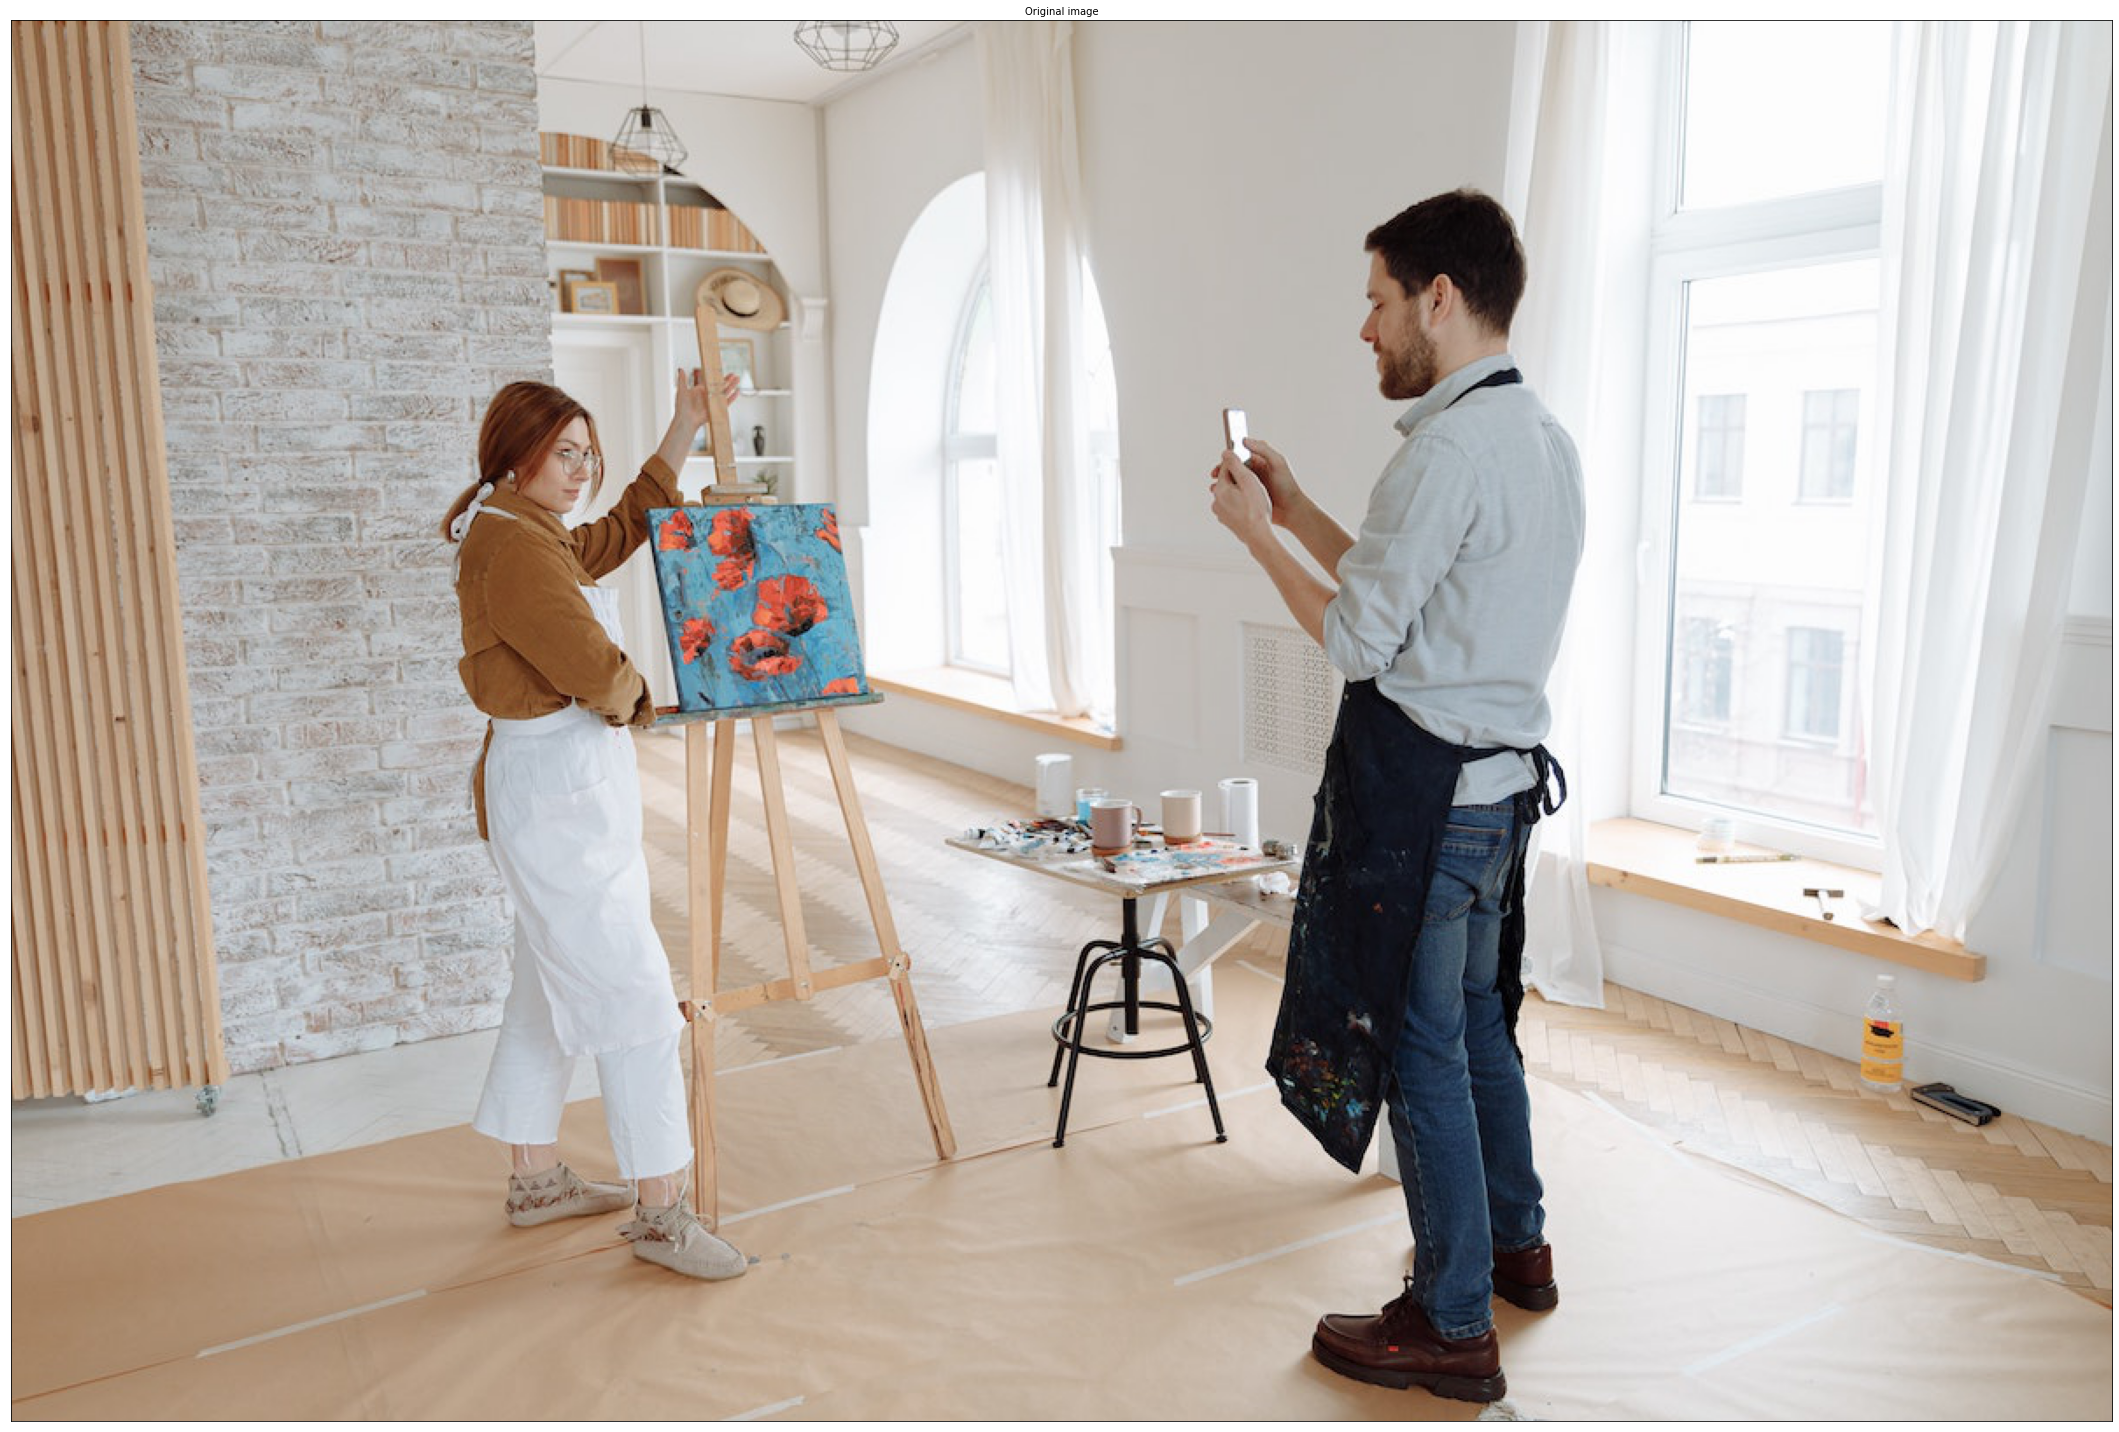

In [26]:
# load and check the original image
from PIL import Image

org_img = Image.open('pexels-image.jpg')
print(f'size: {org_img.size}, type: {type(org_img)}')
plot_images([org_img])

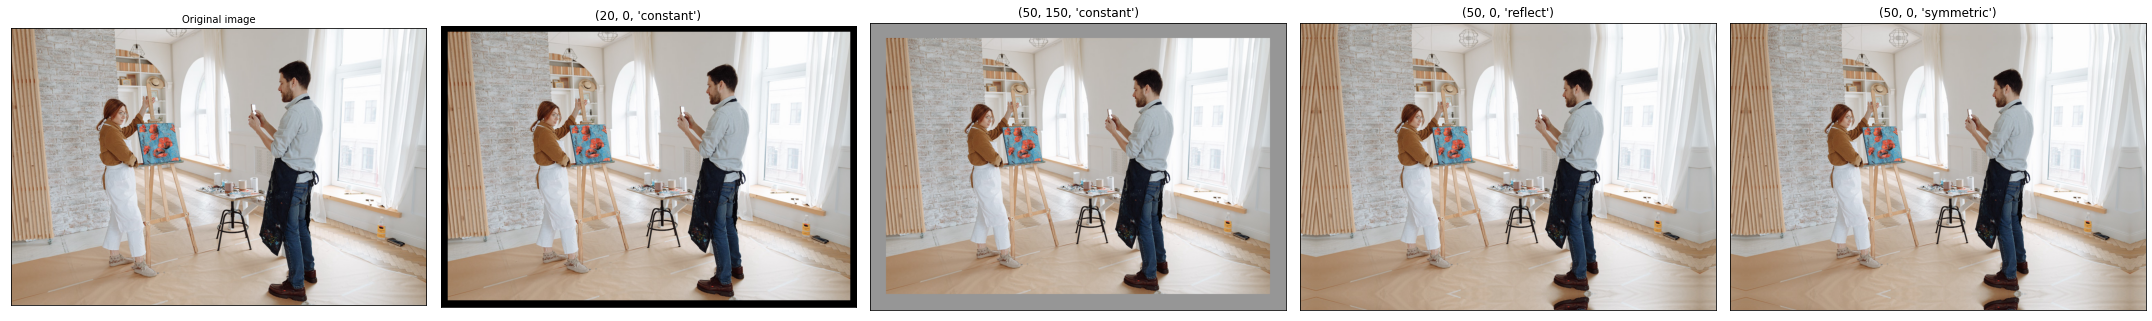

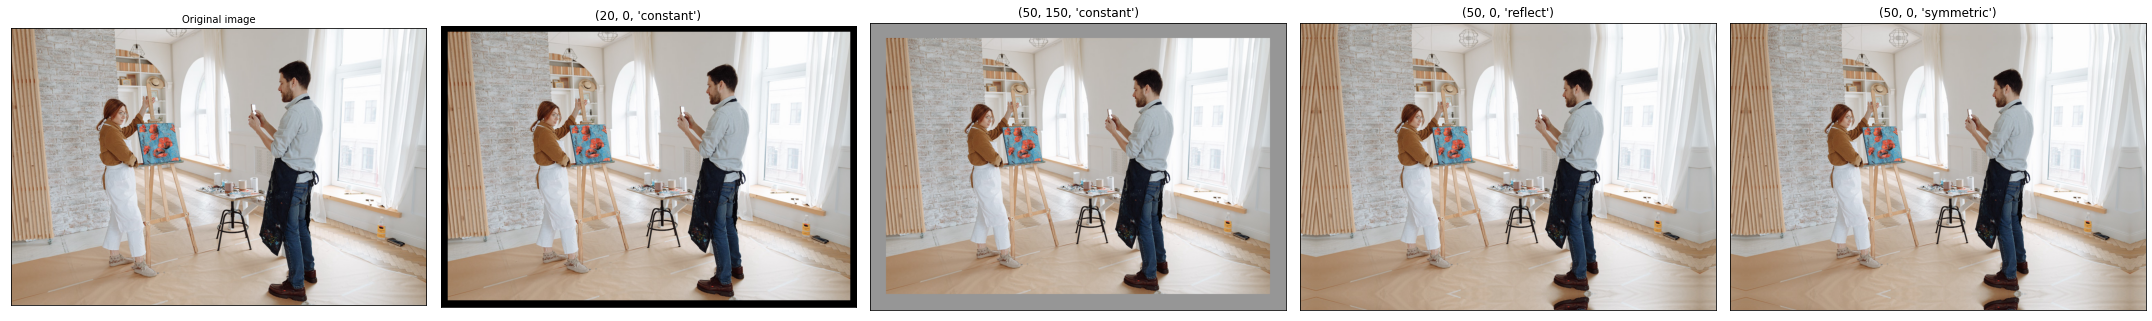

In [3]:
# import torchvision.transforms and torchvision.transforms.functional
import torchvision.transforms as T
import torchvision.transforms.functional as F

# arguments for padding
padding = (20, 50, 50, 50) # pad with each length
fill = (0, 150, 0, 0) # pad with each pixel value
padding_mode = ('constant', 'constant', 'reflect', 'symmetric') # pad in each mode
args = [(p, f, m) for p, f, m in zip_longest(padding, fill, padding_mode)] # combine the arguments

# torchvision.transforms.Pad(class)
padded_imgs_T = [org_img]
padded_imgs_T += [T.Pad(padding=p, fill=f, padding_mode=m)(org_img) # pad org_img with arg(p, f, m) in args
                  for p, f, m in args]
plot_images(padded_imgs_T, args)

# torchvision.transforms.functional.pad(function)
padded_imgs_F = [org_img]
padded_imgs_F += [F.pad(img=org_img, padding=p, fill=f, padding_mode=m) # same with the above Pad
                  for p, f, m in args]
plot_images(padded_imgs_F, args)

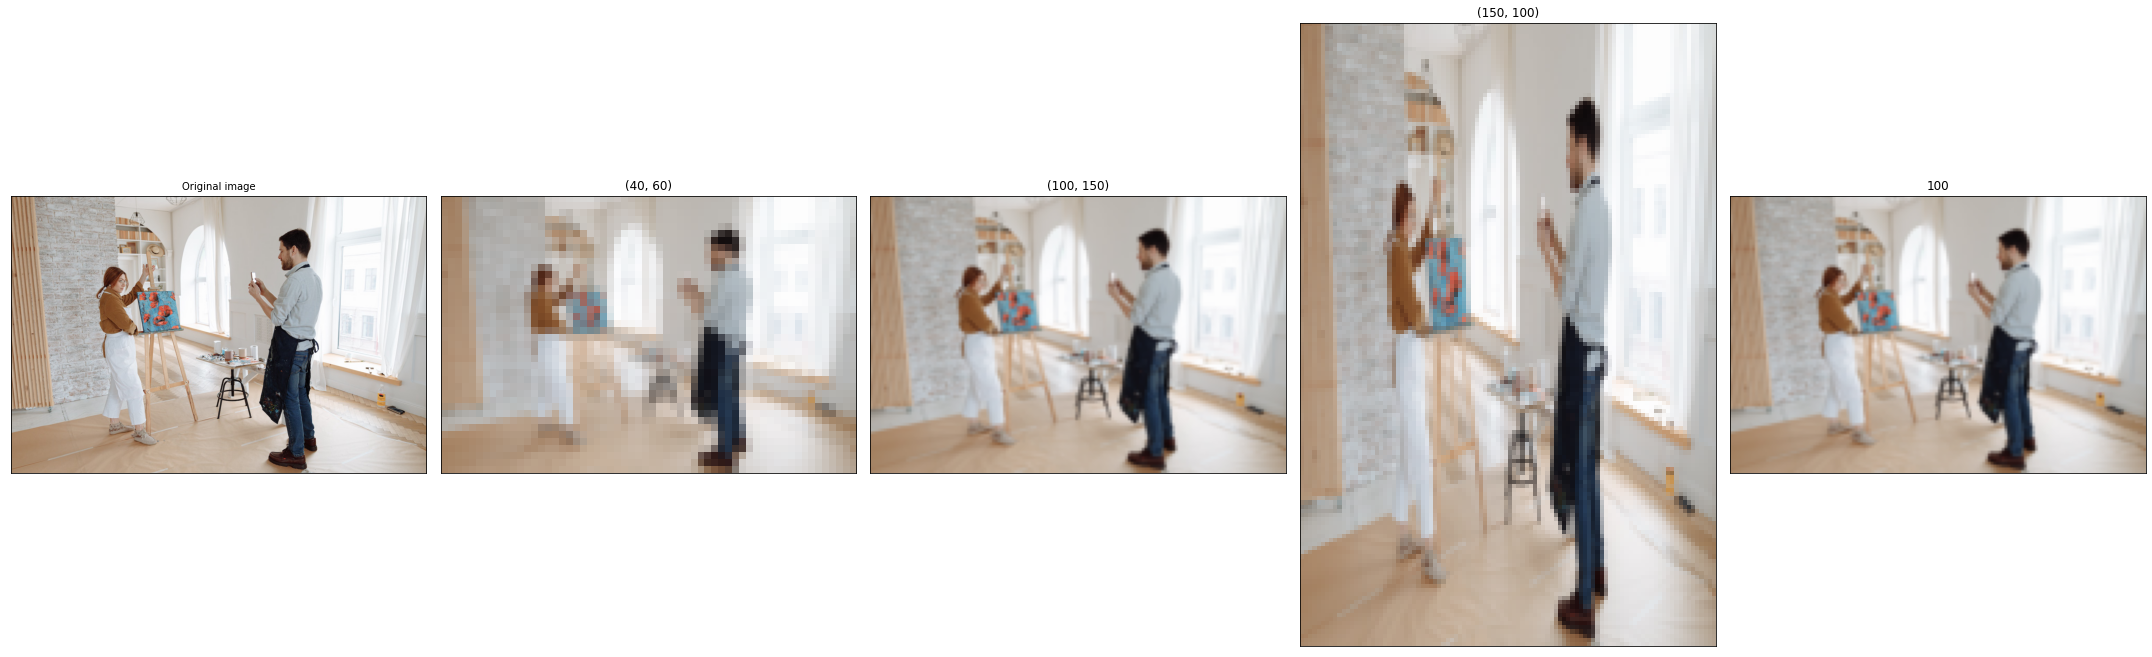

In [48]:
# torchvision.transforms.Resize (torchvision.transforms.functional.resize)
sizes = [(40, 60), (100, 150), (150, 100), 100] # resize to each size (or single integer value)

resized_imgs = [org_img]
resized_imgs += [F.resize(org_img, size=s) for s in sizes]
plot_images(resized_imgs, sizes)

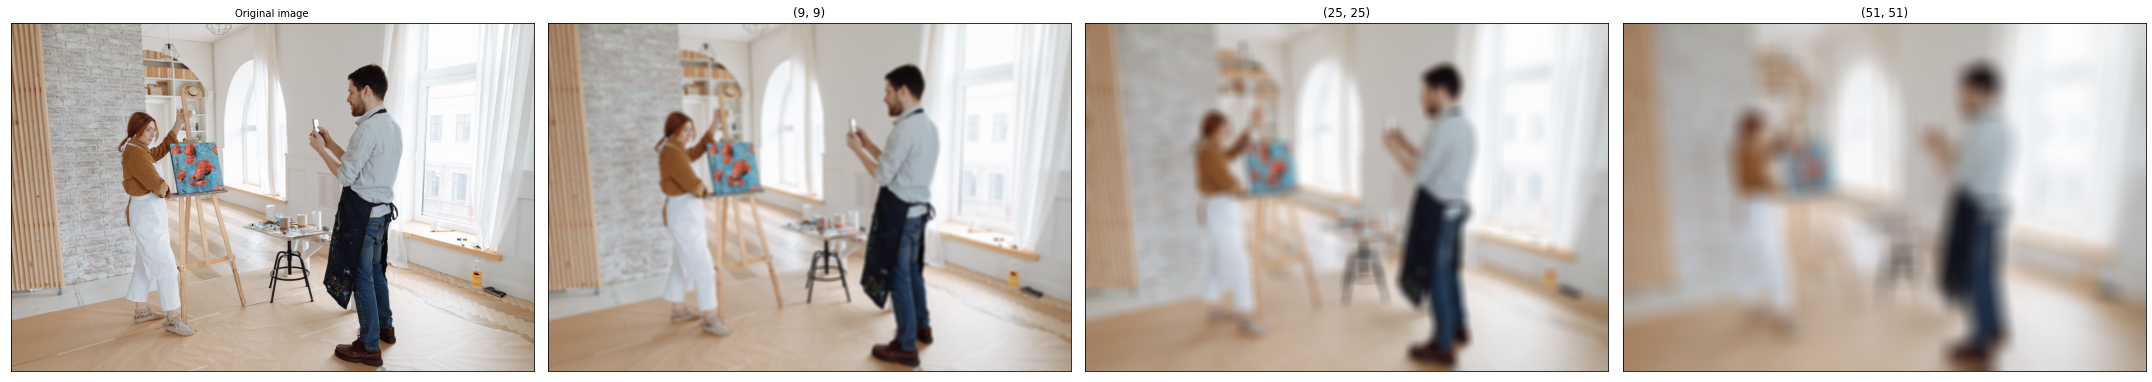

In [49]:
# torchvision.transforms.GaussianBlur (or torchvision.transforms.functional.gaussian_blur)
sequences = [(9, 9), (25, 25), (51, 51)] # blur with each tuple of both kernal size and kernal standard deviation

blurred_imgs = [org_img] + [F.gaussian_blur(org_img, kernel_size=s, sigma=s) for s in sequences]
plot_images(blurred_imgs, sequences)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shape: torch.Size([3, 800, 1200]), type: <class 'torch.Tensor'>
tensor([[[0.5882, 0.6118, 0.5647,  ..., 0.8431, 0.8431, 0.8392],
         [0.5765, 0.6118, 0.5804,  ..., 0.8431, 0.8431, 0.8392],
         [0.5686, 0.6078, 0.5804,  ..., 0.8431, 0.8431, 0.8392],
         ...,
         [0.6510, 0.6549, 0.6549,  ..., 0.7020, 0.6980, 0.6902],
         [0.6510, 0.6549, 0.6549,  ..., 0.6980, 0.6980, 0.6902],
         [0.6510, 0.6549, 0.6549,  ..., 0.6980, 0.6941, 0.6863]],

        [[0.4471, 0.4431, 0.3725,  ..., 0.8510, 0.8510, 0.8471],
         [0.4353, 0.4510, 0.4000,  ..., 0.8510, 0.8510, 0.8471],
         [0.4275, 0.4471, 0.3961,  ..., 0.8510, 0.8510, 0.8471],
         ...,
         [0.5294, 0.5333, 0.5333,  ..., 0.6353, 0.6314, 0.6235],
         [0.5294, 0.5333, 0.5333,  ..., 0.6314, 0.6314, 0.6235],
         [0.5294, 0.5333, 0.5333,  ..., 0.6314, 0.6275, 0.6196]],

        [[0.3137, 0.3176, 0.2471,  ..., 0.8471, 0.8471, 0.8431],
         [0.3098, 0.3255, 0.2706,  ..., 0.8471, 0.8471, 0.8

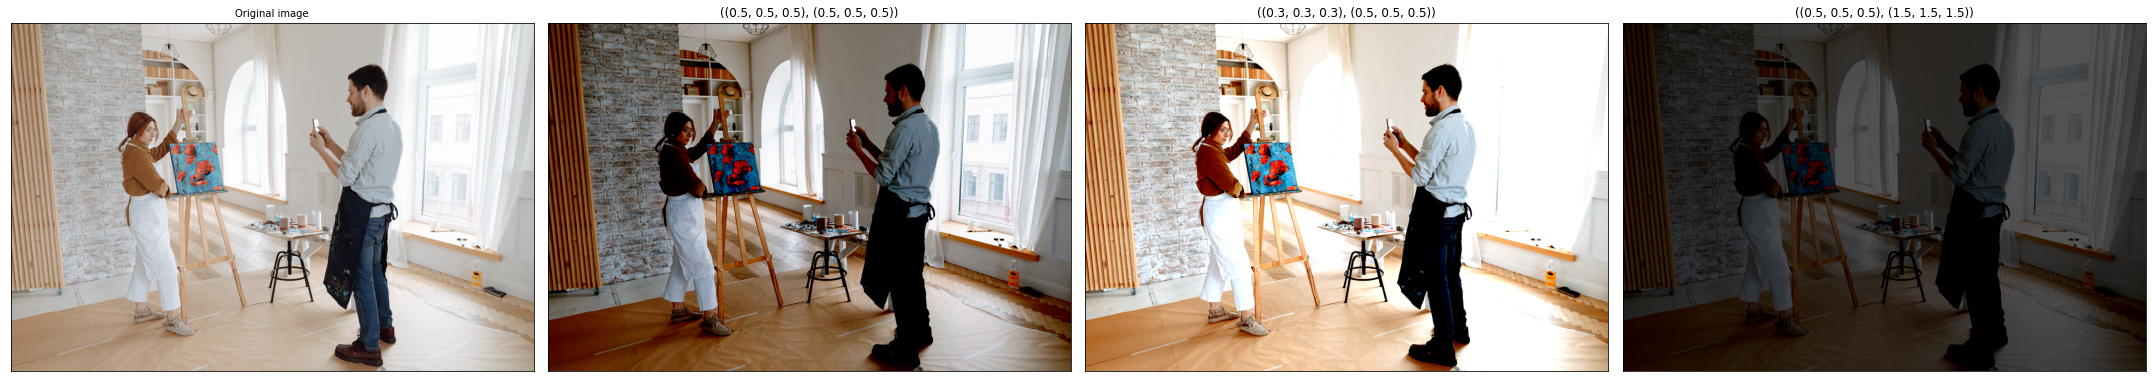

In [50]:
# torchvision.transforms.Normalize (or torchvision.transforms.functional.normalize)
means = [(0.5, 0.5, 0.5), (0.3, 0.3, 0.3), (0.5, 0.5, 0.5)] # normalize each channel with means
stds = [(0.5, 0.5, 0.5), (0.5, 0.5, 0.5), (1.5, 1.5, 1.5)] # normalize each channel with standard deviation
args = [(m, s) for m, s in zip_longest(means, stds)]

org_img_tensor = F.to_tensor(org_img)
print(f'shape: {org_img_tensor.shape}, type: {type(org_img_tensor)}')

normalized_imgs = [org_img_tensor]
normalized_imgs += [F.normalize(org_img_tensor, mean=m, std=s) for m, s in args]
for i in normalized_imgs:
    print(i)
plot_images(normalized_imgs, args)